<a href="https://colab.research.google.com/github/murisettysharmila28-creator/MachineLearning/blob/main/ML_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fire Incidents EDA**

## Context:
This dataset provides detailed information on fire incidents recorded by the Toronto Fire Services (TFS). Exploring data to help analyze trends, causes, and outcomes of fire incidents to support public safety initiatives, risk assessment, and resource optimization for emergency response planning.

### Objective:

The goal of this Exploratory Data Analysis (EDA) is to:



*   Understand patterns and frequency of fire incidents across different areas and time periods.
*   Identify major causes of fires, common ignition sources, and property types most affected.
*   Assess the impact of fires — including casualties, displacement, and estimated losses.
*   Evaluate the effectiveness of fire prevention systems (e.g., smoke alarms, sprinklers).
*   Generate insights for fire prevention strategies and potential policy recommendations.


In [ ]:
pip install pandas

In [73]:
# Importing necessary Libraries to perform Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Customising backgound and color pallette

sns.set_style("whitegrid")      # Clean background with gridlines

fire_palette = {
    "loss": "#E53935",        # red
    "casualties": "#F57C00",  # orange
    "response": "#1E88E5",    # blue
    "containment": "#43A047", # green
    "neutral": "#6D6D6D"      # gray
}

In [13]:
from google.colab import files
uploaded = files.upload()



In [ ]:
# Reading CSV File
df = pd.read_csv('Fire_Incidents_Data.csv')

/tmp/ipython-input-3333608240.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Fire_Incidents_Data.csv')


In [ ]:
# Dataset has 32929 instances and 43 features

df.shape

(32929, 43)

In [19]:
# Check for nulls and other basic info from data like memory usage and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32929 entries, 0 to 32928
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   _id                                                            32929 non-null  int64  
 1   Incident_Number                                                32929 non-null  object 
 2   Initial_CAD_Event_Type                                         32928 non-null  object 
 3   Final_Incident_Type                                            32929 non-null  object 
 4   Exposures                                                      7511 non-null   float64
 5   Incident_Station_Area                                          32928 non-null  object 
 6   Incident_Ward                                                  32782 non-null  float64
 7   Intersection                                              

Observations:
- All columns have different count of non-null objects which indicate there are **missing values** because the total instances are 32,929
- There are three data types float(11), integer(64) and Objects(31)

In [78]:
# shows first 5 rows
df.head()

,_id,Incident_Number,Initial_CAD_Event_Type,Final_Incident_Type,Exposures,Incident_Station_Area,Incident_Ward,Intersection,Latitude,Longitude,...,Possible_Cause,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Fire_Alarm_System_Presence,Fire_Alarm_System_Operation,Fire_Alarm_System_Impact_on_Evacuation,Sprinkler_System_Presence,Sprinkler_System_Operation
0,1,F18020969,Fire - Grass/Rubbish,01 - Fire,NaN,116,18.0,Sheppard Ave E / Clairtrell Rd,43.766135,-79.390039,...,03 - Suspected Vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,F18021182,Fire - Highrise Residential,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,221,21.0,Danforth Rd / Savarin St,43.743230,-79.245061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,F18021192,Fire - Commercial/Industrial,01 - Fire,NaN,133,5.0,Keele St / Lawrence Ave W,43.708659,-79.478062,...,99 - Undetermined,9 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,9 - Undetermined,8 - Not applicable - no sprinkler system present
3,4,F18021271,Fire - Residential,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,132,8.0,Replin Rd / Tapestry Lane,43.718118,-79.443184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F18021274,Vehicle Fire,01 - Fire,NaN,215,25.0,Lawrence Ave E / Beechgrove Dr,43.773787,-79.162282,...,99 - Undetermined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# shows last 5 rows
df.head()

,_id,Incident_Number,Initial_CAD_Event_Type,Final_Incident_Type,Exposures,Incident_Station_Area,Incident_Ward,Intersection,Latitude,Longitude,...,Possible_Cause,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Fire_Alarm_System_Presence,Fire_Alarm_System_Operation,Fire_Alarm_System_Impact_on_Evacuation,Sprinkler_System_Presence,Sprinkler_System_Operation
0,1,F18020969,Fire - Grass/Rubbish,01 - Fire,NaN,116,18.0,Sheppard Ave E / Clairtrell Rd,43.766135,-79.390039,...,03 - Suspected Vandalism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,F18021182,Fire - Highrise Residential,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,221,21.0,Danforth Rd / Savarin St,43.743230,-79.245061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,F18021192,Fire - Commercial/Industrial,01 - Fire,NaN,133,5.0,Keele St / Lawrence Ave W,43.708659,-79.478062,...,99 - Undetermined,9 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,9 - Undetermined,8 - Not applicable - no sprinkler system present
3,4,F18021271,Fire - Residential,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,132,8.0,Replin Rd / Tapestry Lane,43.718118,-79.443184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F18021274,Vehicle Fire,01 - Fire,NaN,215,25.0,Lawrence Ave E / Beechgrove Dr,43.773787,-79.162282,...,99 - Undetermined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

From the first and last 5 rows we can see that the data is not complete. There are missing or NULL values. Data has to be cleaned further

### **Univariate Analysis**

In [20]:
# Will provide analytic summary of Numerical features 'count of persons rescude'
df.describe()

,_id,Exposures,Incident_Ward,Latitude,Longitude,Number_of_responding_apparatus,Number_of_responding_personnel,Count_of_Persons_Rescued,TFS_Firefighter_Casualties,Civilian_Casualties,Estimated_Number_Of_Persons_Displaced,Estimated_Dollar_Loss
count,32929.000000,7511.000000,32782.000000,32927.000000,32927.000000,32707.000000,32707.000000,32706.000000,32707.000000,25796.000000,16864.000000,2.395000e+04
mean,16465.000000,0.106244,15.365261,43.703822,-79.399003,6.318342,21.194546,0.039412,0.010090,0.069701,16.278048,3.808555e+04
std,9505.927844,0.459145,10.341056,0.246656,0.449583,7.475313,23.428962,0.865980,0.120217,0.353241,116.377067,3.985637e+05
min,1.000000,0.000000,0.000000,0.000000,-79.639460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8233.000000,0.000000,7.000000,43.660681,-79.478722,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02
50%,16465.000000,0.000000,13.000000,43.697550,-79.399677,6.000000,19.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03
75%,24697.000000,0.000000,21.000000,43.749940,-79.336880,7.000000,25.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+04
max,32929.000000,7.000000,44.000000,43.855400,0.000000,436.000000,1275.000000,86.000000,4.000000,15.000000,999.000000,5.000000e+07


Observations:
- Most incidents are small fires with minimal casualties or displacement. Since **Mean is (0.7)** which means most of the incidents resulted in 0 casualities and **Max is 15** which shows that few of the incidents were Catastrophic resulting in casualites.
- A few large incidents contribute disproportionately to total losses. **Mean is 16**, but **median = 0** which shows displacement occurs in only in a few incidents.


In [21]:
# Check stats for categorical(objects) data
df.describe(include='object')

,Incident_Number,Initial_CAD_Event_Type,Final_Incident_Type,Incident_Station_Area,Intersection,Property_Use,Building_Status,TFS_Alarm_Time,TFS_Arrival_Time,Ext_agent_app_or_defer_time,...,Possible_Cause,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Fire_Alarm_System_Presence,Fire_Alarm_System_Operation,Fire_Alarm_System_Impact_on_Evacuation,Sprinkler_System_Presence,Sprinkler_System_Operation
count,32929,32928,32929,32928,32927,32705,16867,32929,32928,23917,...,23926,16864,16864,16864,16864,16864,16864,16864,16864,16864
unique,32929,139,3,254,10806,361,7,32928,32927,23908,...,32,10,11,6,7,4,4,7,4,7
top,F23120772,Fire - Grass/Rubbish,01 - Fire,426,Sherbourne St / Shuter St / Moss Park Trl,323 - Multi-Unit Dwelling - Over 12 Units,01 - Normal (no change),2023-03-29T05:49:29,2020-03-22T18:15:17,2016-01-16T20:10:00,...,99 - Undetermined,2 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,1 - All persons (at risk of injury) self evacu...,1 - Fire alarm system present,1 - Fire alarm system operated,"8 - Not applicable: No fire alarm system, no p...",3 - No sprinkler system,8 - Not applicable - no sprinkler system present
freq,1,5124,23991,521,111,5208,14668,2,2,2,...,4035,6296,11823,3911,4333,9334,6855,4594,9741,10225


Observations:
- We see that **Fire from grass/Rubbish** is a top contributor to majority of Fire incidents
- **Multi-Unit dwellings** were the most affected Property type
- **Fire alarams** were **present** for most properties that had a Fire incident and the alarams operated when there was an incident
- Most of the properties that had a fire incident did not have a **Sprinkler System Present**

### **Plotting distribution for numerical columns**

### **Response & Resources distribution**

To explore how the Fire department responded to incidents and what resources were used

**Distribution of Responding Apparatus**

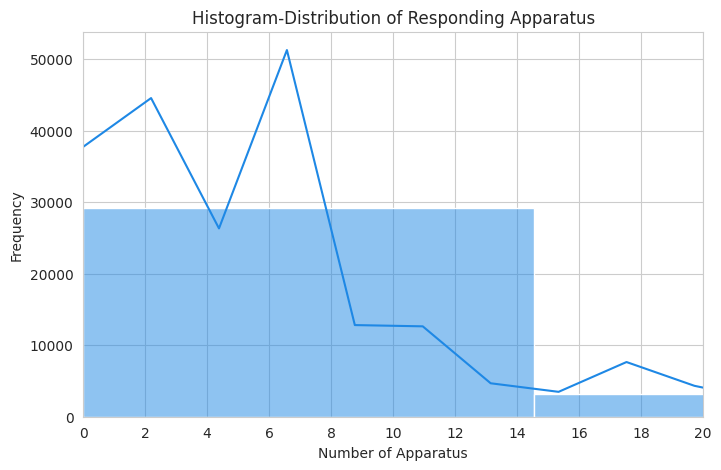

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(df['Number_of_responding_apparatus'], bins=30, kde=True, color=fire_palette["response"])
plt.title("Histogram-Distribution of Responding Apparatus")
plt.xlabel("Number of Apparatus")
plt.ylabel("Frequency")
plt.xticks(range(0, 21, 2))   # Show ticks every 2 units
#plt.xscale('log) # Compress long tail
plt.xlim(0, 20)   # show only 0–50 on x-axis
plt.show()

Observation:

- Shows how many fire trucks (apparatus) respond per incident.
- Graph is right skewed, majority of data is on the right side
- 30,000 Fire Incidents fall into a range where 2–6 apparatus responded. Which says most of the incidents were small

**Distribution of Responding Personnel**

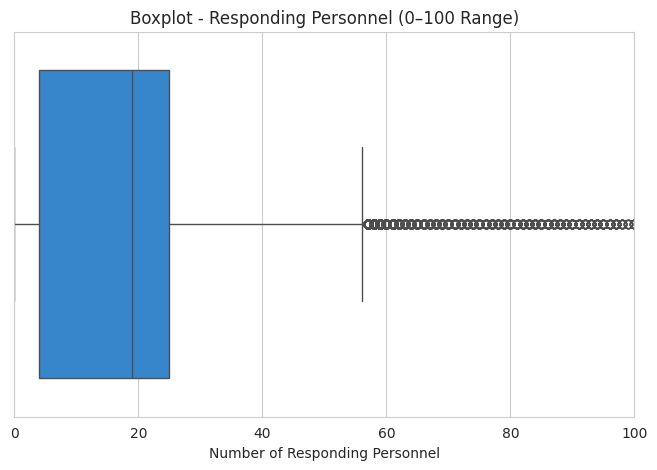

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Number_of_responding_personnel'],color=fire_palette["response"])
plt.xlim(0, 100)  # limits x-axis
plt.title("Boxplot - Responding Personnel (0–100 Range)")
plt.xlabel("Number of Responding Personnel")
plt.show()

Observation:
- This boxplot represents the distribution of the number of fire personnel who responded to incidents, but only within the 0-100 range (excluding extreme outliers).
- The box extends roughly from *10 to 25 personnel*, indicating that most responses fall within this narrow range
- Whiskers stretch to **around 50-60**, after which you start seeing outlier dots — these are rare, large-scale incidents requiring much larger teams
- Most incidents are small, and only a few need more than 50 responders

**Exposures**: This feature represent, Secondary structures or areas exposed to the main fire


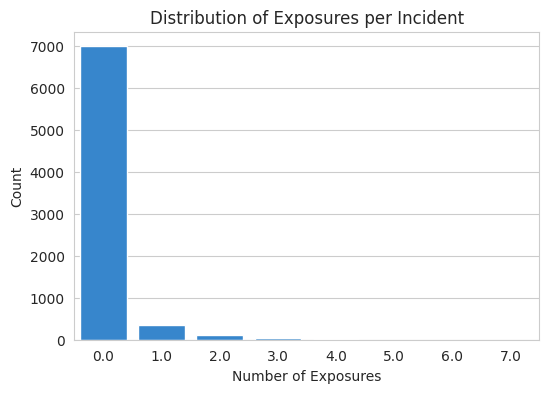

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exposures', data=df, color=fire_palette["response"])
plt.title("Distribution of Exposures per Incident")
plt.xlabel("Number of Exposures")
plt.ylabel("Count")
plt.show()

Observation:

- **Exposures** is a **discreate** feature, with the help of Countplot we see that Majority of Fire Incidents did not impact any secodary structures or area
- Most fires were contained to the original property

## **Casualities & Rescue**

**Distribution of Persons Rescued**